In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import metrics
from scipy import stats

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
dataset= pd.read_csv('/content/drive/My Drive/DS_Project/ML_dataframe.csv', encoding= 'latin1')


In [4]:
x= dataset.Temperature.values 
a= x[27375:36500]
n_data_points = len(x)
arr = np.array(x).reshape(n_data_points)
dataset = np.empty((27370,6)) 

for i in range(27365):
    dataset[i] = arr[i:i+6]  

np.random.shuffle(dataset)
n_training_points = 27375

X_train, y_train = dataset[:n_training_points,:5], dataset[:n_training_points,5]


In [5]:
dataset_test = np.empty((9120,6)) 

for i in range(9115):
    dataset_test[i] = arr[i:i+6]  

np.random.shuffle(dataset_test)
n_testing_points = 27375

X_test, y_test = dataset_test[:n_testing_points,:5], dataset_test[:n_testing_points,5]


In [6]:
reg = LinearRegression()

# Fit the training data
reg.fit(X_train, y_train)

# Make predictions on the test data
lr_pred = reg.predict(X_test)



In [7]:
print('MSE: ', metrics.mean_squared_error(y_test, lr_pred))
print('MAE: ', metrics.mean_absolute_error(y_test, lr_pred))
print('R2: ', metrics.r2_score(y_test, lr_pred))
print('Correlation: ', stats.pearsonr(y_test, lr_pred)[0])
print('RMSLE: ',metrics.mean_squared_log_error(np.absolute(y_test), np.absolute(lr_pred)))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_test, lr_pred))


MSE:  11.607743828945468
MAE:  2.6112501022356893
R2:  0.9122515220838788
Correlation:  0.9551511953759866
RMSLE:  0.0031354489182229546
MAPE:  23046650537383.867


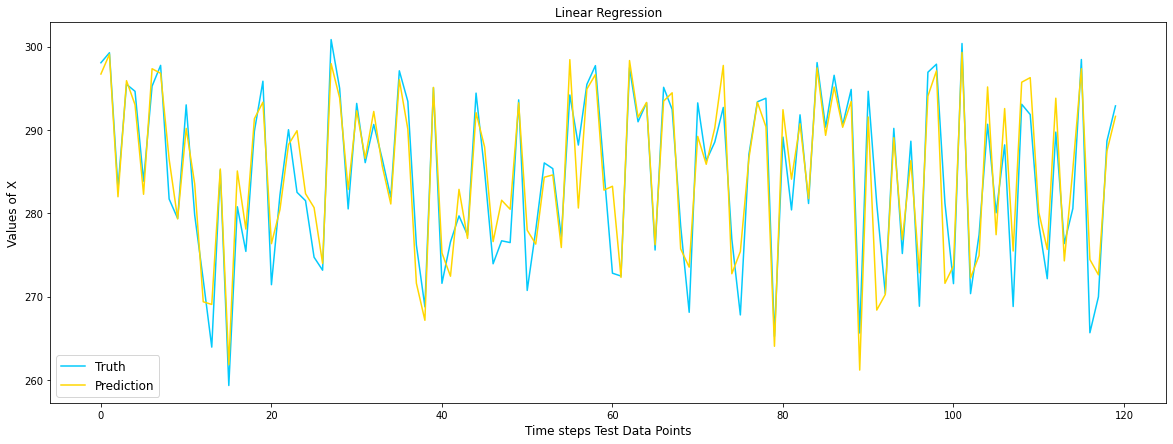

In [8]:
plt.figure(figsize=(20,7))
plt.plot(y_test[9000:9120], label='Truth',color='#03cafc')
plt.plot(lr_pred[9000:9120], label='Prediction',color='gold')

plt.ylabel('Values of X', fontsize=12)
plt.xlabel('Time steps Test Data Points', fontsize=12)
plt.title('Linear Regression')
plt.legend(fontsize=12)
# plt.ylim(-20,25)
plt.show()

In [9]:
!pip install --user setuptools --upgrade


     |████████████████████████████████| 952 kB 5.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [10]:
!pip install --user tensorflow

In [11]:
!pip install --user keras

In [12]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.optimizers import Adam, SGD


In [13]:
# Initialize the model 
model = Sequential()

# Add first hidden layer 
model.add(Dense(32, activation='relu', input_shape=(5,)))

# Add second hidden layer
model.add(Dense(32, activation='relu'))
 
# Add an output layer 
model.add(Dense(1))

In [14]:
optimizer = Adam(lr=0.003)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
epochs = 50
batch_size = 64

history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1)


Epoch 1/50
343/343 [==============================] - 2s 3ms/step - loss: 2906.6694 - mae: 16.3208 - val_loss: 17.5048 - val_mae: 3.2986
Epoch 2/50
343/343 [==============================] - 1s 2ms/step - loss: 16.6016 - mae: 3.1827 - val_loss: 17.1684 - val_mae: 3.2580
Epoch 3/50
343/343 [==============================] - 1s 2ms/step - loss: 16.6421 - mae: 3.1886 - val_loss: 17.4097 - val_mae: 3.2928
Epoch 4/50
343/343 [==============================] - 1s 2ms/step - loss: 16.4065 - mae: 3.1672 - val_loss: 16.7624 - val_mae: 3.2110
Epoch 5/50
343/343 [==============================] - 1s 2ms/step - loss: 16.3616 - mae: 3.1633 - val_loss: 17.0598 - val_mae: 3.2582
Epoch 6/50
343/343 [==============================] - 1s 2ms/step - loss: 16.3646 - mae: 3.1670 - val_loss: 16.4453 - val_mae: 3.1633
Epoch 7/50
343/343 [==============================] - 1s 2ms/step - loss: 16.1691 - mae: 3.1455 - val_loss: 16.1527 - val_mae: 3.1465
Epoch 8/50
343/343 [==============================] - 1s 2m

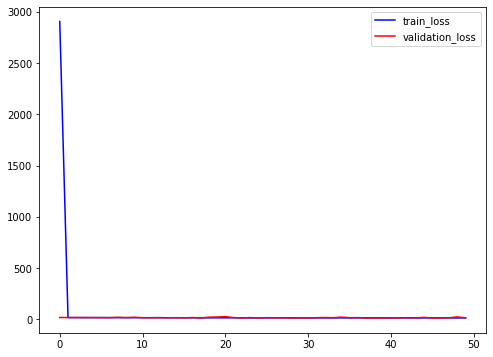

In [16]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], 'b', label='train_loss')
plt.plot(history.history['val_loss'], 'r', label='validation_loss')
plt.legend()


In [17]:
dnn_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test)

print(f'MSE: {score[0]}')
print(f'MAE: {score[1]}')
print('R2: ', metrics.r2_score(y_test, dnn_pred, sample_weight=None, multioutput='uniform_average'))
print('Correlation: ', stats.pearsonr(y_test, dnn_pred[:,0])[0])


print('RMSLE: ',metrics.mean_squared_log_error(np.absolute(y_test), np.absolute(dnn_pred[:,0])))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_test, dnn_pred[:,0]))

285/285 [==============================] - 1s 2ms/step - loss: 12.0781 - mae: 2.6436
MSE: 12.078082084655762
MAE: 2.643637180328369
R2:  0.9086959674670135
Correlation:  0.9549429095271982
RMSLE:  0.0001516523994052151
MAPE:  30027905347.377785


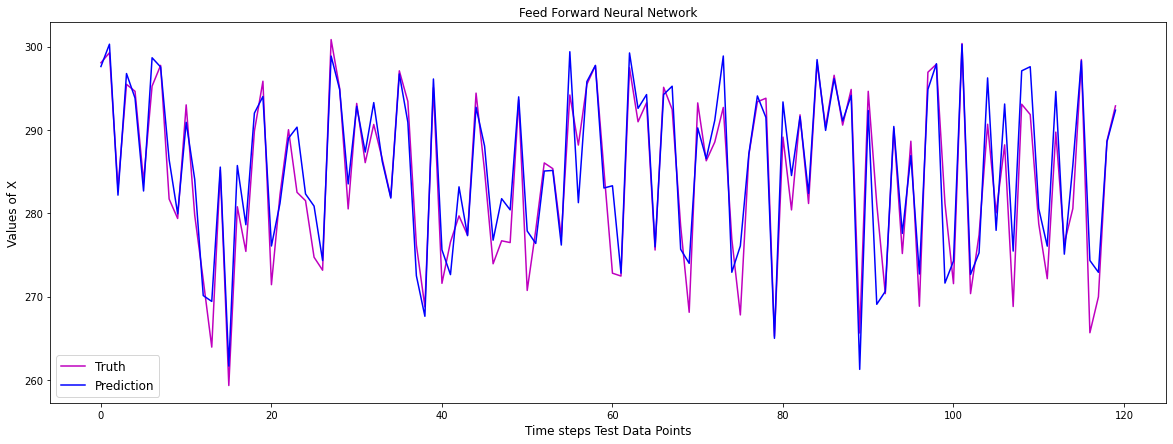

In [18]:
plt.figure(figsize=(20,7))
plt.plot(y_test[9000:9120],'m',label='Truth')
plt.plot(dnn_pred[9000:9120],'b', label='Prediction')
plt.ylabel('Values of X', fontsize=12)
plt.xlabel('Time steps Test Data Points', fontsize=12)
plt.title('Feed Forward Neural Network')
plt.legend(fontsize=12)
plt.show()